In [47]:
import numpy as np
from matplotlib import pyplot as plt
import uproot

In [48]:
with uproot.open("/data/QE_MC20_v4_r13167_HWWlvlv.root") as file:
    print(file.keys())
    branches = file["truth;1"]
    print(branches.keys())
    data = branches.arrays(library="np")

['truth;1']
['higgs_pt', 'higgs_eta', 'higgs_phi', 'higgs_m', 'higgs_pdgId', 'w_pos_pt', 'w_pos_eta', 'w_pos_phi', 'w_pos_m', 'w_pos_pdgId', 'lep_pos_pt', 'lep_pos_eta', 'lep_pos_phi', 'lep_pos_pdgId', 'nu_pt', 'nu_eta', 'nu_phi', 'nu_pdgId', 'w_neg_pt', 'w_neg_eta', 'w_neg_phi', 'w_neg_m', 'w_neg_pdgId', 'lep_neg_pt', 'lep_neg_eta', 'lep_neg_phi', 'lep_neg_pdgId', 'anti_nu_pt', 'anti_nu_eta', 'anti_nu_phi', 'anti_nu_pdgId']


In [49]:
lep_pos_pt  = data["lep_pos_pt"]
lep_pos_eta = data["lep_pos_eta"]
lep_pos_phi = data["lep_pos_phi"]
lep_pos_m   = np.zeros_like(lep_pos_pt)
nu_pt  = data["nu_pt"]
nu_eta = data["nu_eta"]
nu_phi = data["nu_phi"]
nu_m   = np.zeros_like(nu_pt)

w_pos_pt  = data["w_pos_pt"]
w_pos_eta = data["w_pos_eta"]
w_pos_phi = data["w_pos_phi"]
w_pos_m   = data["w_pos_m"]

lep_neg_pt  = data["lep_neg_pt"]
lep_neg_eta = data["lep_neg_eta"]
lep_neg_phi = data["lep_neg_phi"]
lep_neg_m   = np.zeros_like(lep_neg_pt)
anti_nu_pt  = data["anti_nu_pt"]
anti_nu_eta = data["anti_nu_eta"]
anti_nu_phi = data["anti_nu_phi"]
anti_nu_m   = np.zeros_like(anti_nu_pt)

w_neg_pt  = data["w_neg_pt"]
w_neg_eta = data["w_neg_eta"]
w_neg_phi = data["w_neg_phi"]
w_neg_m   = data["w_neg_m"]


In [50]:
lep_pos_pdgid = branches["lep_pos_pdgId"].array(library="np")
print(np.unique(lep_pos_pdgid))
pos_el = (lep_pos_pdgid == -11)
pos_mu = (lep_pos_pdgid == -13)

lep_neg_pdgid = branches["lep_neg_pdgId"].array(library="np")
print(np.unique(lep_neg_pdgid))
neg_el = (lep_neg_pdgid == 11)
neg_mu = (lep_neg_pdgid == 13)

nu_pdgid = branches["nu_pdgId"].array(library="np")
print(np.unique(nu_pdgid))
nu_e_pdgid  = (nu_pdgid  == 12)
nu_mu_pdgid = (nu_pdgid  == 14)

anti_nu_pdgid = branches["anti_nu_pdgId"].array(library="np")
print(np.unique(anti_nu_pdgid))
anti_nu_e_pdgid = (anti_nu_pdgid == -12)
anti_nu_mu_pdgid = (anti_nu_pdgid == -14)

[-15 -13 -11]
[11 13 15]
[12 14 16]
[-16 -14 -12]


In [51]:
def px(pt, phi):
    return pt * np.cos(phi)

def py(pt, phi):
    return pt * np.sin(phi)

def pz(pt, eta):    
    return pt * np.sinh(eta)

def energy(pt, eta, m):
    return np.sqrt(np.square(pt) * np.square(np.cosh(eta)) + np.square(m))

In [52]:
lep_pos_px = px(lep_pos_pt, lep_pos_phi)
lep_pos_py = py(lep_pos_pt, lep_pos_phi)
lep_pos_pz = pz(lep_pos_pt, lep_pos_eta)
lep_pos_E = energy(lep_pos_pt, lep_pos_eta, lep_pos_m)

w_pos_px = px(w_pos_pt, w_pos_phi)
w_pos_py = py(w_pos_pt, w_pos_phi)
w_pos_pz = pz(w_pos_pt, w_pos_eta)
w_pos_E  = energy(w_pos_pt, w_pos_eta, w_pos_m)

nu_px = px(nu_pt, nu_phi)
nu_py = py(nu_pt, nu_phi)
nu_pz = pz(nu_pt, nu_eta)
nu_E = energy(nu_pt, nu_eta, nu_m)

lep_neg_px = px(lep_neg_pt, lep_neg_phi)
lep_neg_py = py(lep_neg_pt, lep_neg_phi)
lep_neg_pz = pz(lep_neg_pt, lep_neg_eta)
lep_neg_E = energy(lep_neg_pt, lep_neg_eta, lep_neg_m)

w_neg_px = px(w_neg_pt, w_neg_phi)
w_neg_py = py(w_neg_pt, w_neg_phi)
w_neg_pz = pz(w_neg_pt, w_neg_eta)
w_neg_E  = energy(w_neg_pt, w_neg_eta, w_neg_m)

anti_nu_px = px(anti_nu_pt, anti_nu_phi)
anti_nu_py = py(anti_nu_pt, anti_nu_phi)
anti_nu_pz = pz(anti_nu_pt, anti_nu_eta)
anti_nu_E = energy(anti_nu_pt, anti_nu_eta, anti_nu_m)

In [53]:
#DF -> oppsite charge of el and mu
df_mask = (lep_pos_pdgid * lep_neg_pdgid) == (-11 * 13)
assert len(lep_pos_eta[df_mask]) == len(lep_neg_eta[df_mask])
print(f"DF mask sum : {np.sum(df_mask)}")

lep_pos_pdgid = lep_pos_pdgid[df_mask]
lep_pos_eta   = lep_pos_eta[df_mask]
lep_pos_pt    = lep_pos_pt[df_mask]
lep_pos_px    = lep_pos_px[df_mask]
lep_pos_py    = lep_pos_py[df_mask]
lep_pos_pz    = lep_pos_pz[df_mask]
lep_pos_E     = lep_pos_E[df_mask]
nu_px         = nu_px[df_mask]
nu_py         = nu_py[df_mask]

lep_neg_pdgid = lep_neg_pdgid[df_mask]
lep_neg_eta   = lep_neg_eta[df_mask]
lep_neg_pt    = lep_neg_pt[df_mask]
lep_neg_px    = lep_neg_px[df_mask]
lep_neg_py    = lep_neg_py[df_mask]
lep_neg_pz    = lep_neg_pz[df_mask]
lep_neg_E     = lep_neg_E[df_mask]
anti_nu_px    = anti_nu_px[df_mask]
anti_nu_py    = anti_nu_py[df_mask]

DF mask sum : 809139


In [ ]:
#el selection: abs(eta) < 2.47 and crack[1.37, 1.52]
pos_is_e = lep_pos_pdgid == -11
neg_is_e = lep_neg_pdgid == 11
pos_e_accept = (np.abs(lep_pos_eta) < 2.47) & ~((np.abs(lep_pos_eta) > 1.37) & (np.abs(lep_pos_eta) < 1.52))
neg_e_accept = (np.abs(lep_neg_eta) < 2.47) & ~((np.abs(lep_neg_eta) > 1.37) & (np.abs(lep_neg_eta) < 1.52))
el_eta_mask = (pos_is_e & pos_e_accept) | (neg_is_e & neg_e_accept)
print(f"el_mask masks out: {np.sum(df_mask) - np.sum(el_eta_mask)}")

#mu selection: abs(eta) < 2.5 
pos_is_mu = lep_pos_pdgid == -13
neg_is_mu = lep_neg_pdgid == 13
pos_mu_accept = (np.abs(lep_pos_eta) < 2.5)
neg_mu_accept = (np.abs(lep_neg_eta) < 2.5)
mu_eta_mask = (pos_is_mu & pos_mu_accept) | (neg_is_mu & neg_mu_accept)
print(f"mu_mask masks out: {np.sum(df_mask) - np.sum(mu_eta_mask)}")

#pt^leading > 22GeV and pt^subleading > 15GeV
lead_pt    = np.where(lep_pos_pt >= lep_neg_pt, lep_pos_pt, lep_neg_pt)
sublead_pt = np.where(lep_pos_pt <  lep_neg_pt, lep_pos_pt, lep_neg_pt)
pt_mask = (lead_pt > 22e3) & (sublead_pt > 15e3) 
print(f"pt_mask masks put: {np.sum(df_mask) - np.sum(pt_mask)}")

#m_dilepton > 10GeV
pos_is_light = (pos_is_e) | (pos_is_mu)
neg_is_light = (neg_is_e) | (neg_is_mu)
m_dilepton = pos_is_light & neg_is_light
px1, py1, pz1, E1 = lep_pos_px, lep_pos_py, lep_pos_pz, lep_pos_E
px2, py2, pz2, E2 = lep_neg_px, lep_neg_py, lep_neg_pz, lep_neg_E
mll2 = np.square(E1 + E2) - np.square(px1 + px2) - np.square(py1 + py2) - np.square(pz1 + pz2)
mll = np.sqrt(np.maximum(mll2, 0.0))
m_dilepton_mask = (mll > 10e3)
print(f"m_dilepton_mask masks put: {np.sum(df_mask) - np.sum(m_dilepton_mask)}")

#pt missing
ptmiss_px = nu_px + anti_nu_px
ptmiss_py = nu_py + anti_nu_py
ptmiss = np.sqrt(np.square(ptmiss_px) + np.square(ptmiss_py))
ptmiss_mask = (ptmiss > 20e3)
print(f"ptmiss_mask masks put: {np.sum(ptmiss_mask)}")
pos_is_lead= pos_is_lead[df_mask]
#W_shell
pos_is_lead = (lep_pos_pt >= lep_neg_pt)
mW_lead = np.where(pos_is_lead, w_pos_m, w_neg_m)
mW_sublead = np.where(pos_is_lead, w_neg_m, w_pos_m)

#total mask
tot_mask = el_eta_mask & mu_eta_mask & pt_mask & m_dilepton_mask & ptmiss_mask 
assert np.sum(df_mask) == len(tot_mask) 
print("")
print(f"Size of DF subset: {len(lep_pos_eta)}")
print(f"tot_mask masks out: {np.sum(df_mask) - np.sum(tot_mask)}")

el_mask masks out: 152227
mu_mask masks out: 106859
pt_mask masks put: 345613
m_dilepton_mask masks put: 40551
ptmiss_mask masks put: 730339


IndexError: boolean index did not match indexed array along axis 0; size of axis is 809139 but size of corresponding boolean axis is 1996481

In [ ]:
mWlead = mW_lead[df_mask]
mW_lead_sel = mW_lead[tot_mask]

mW_sublead = mW_sublead[df_mask]
mW_sublead_sel = mW_sublead[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(-200, 200, 51)
plt.hist(mW_lead_sel * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(mW_sublead_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$p_{xW^+}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

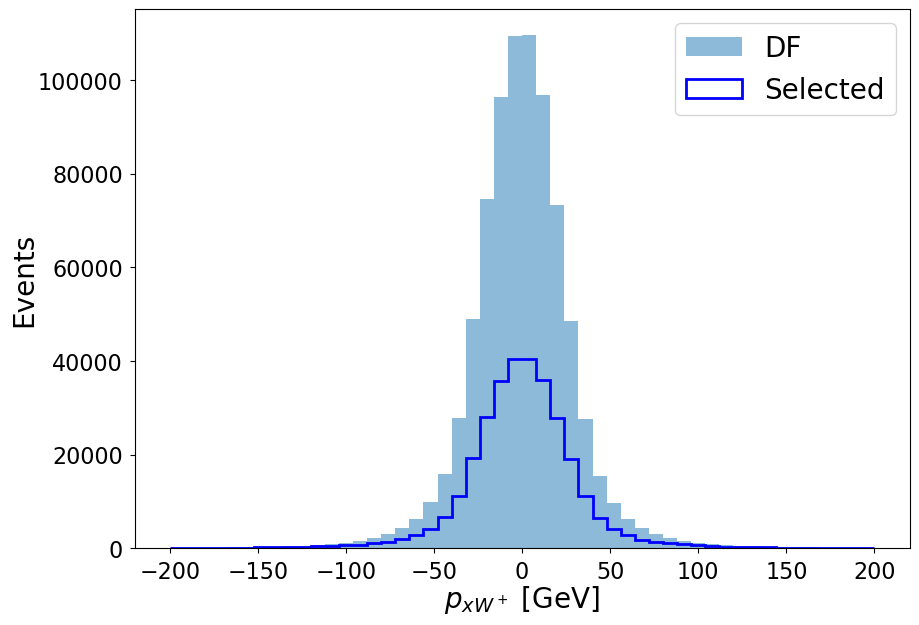

In [ ]:
w_pos_px     = w_pos_px[df_mask]
w_pos_px_sel = w_pos_px[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(-200, 200, 51)
plt.hist(w_pos_px * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_pos_px_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$p_{xW^+}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

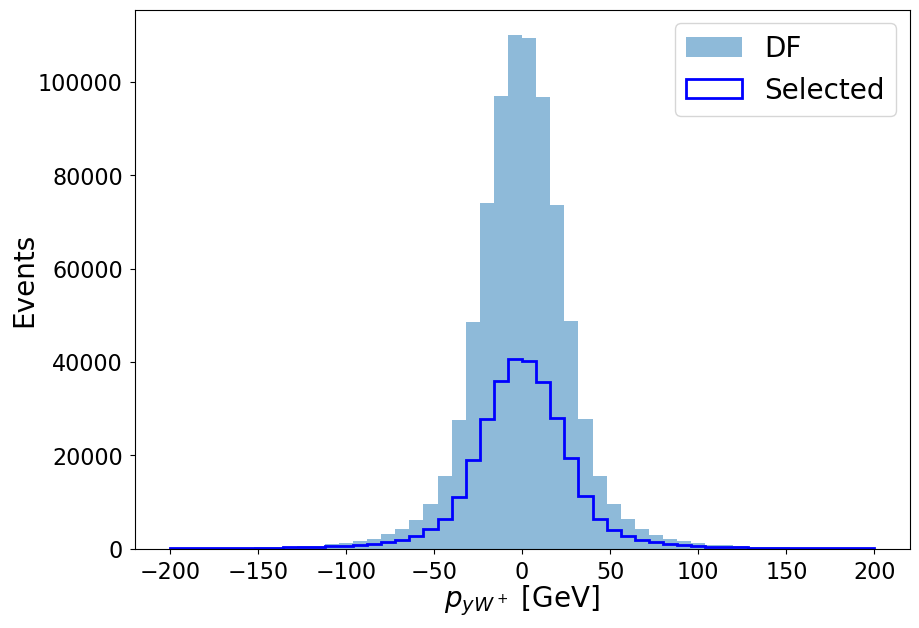

In [ ]:
w_pos_py     = w_pos_py[df_mask]
w_pos_py_sel = w_pos_py[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(-200, 200, 51)
plt.hist(w_pos_py * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_pos_py_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$p_{yW^+}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

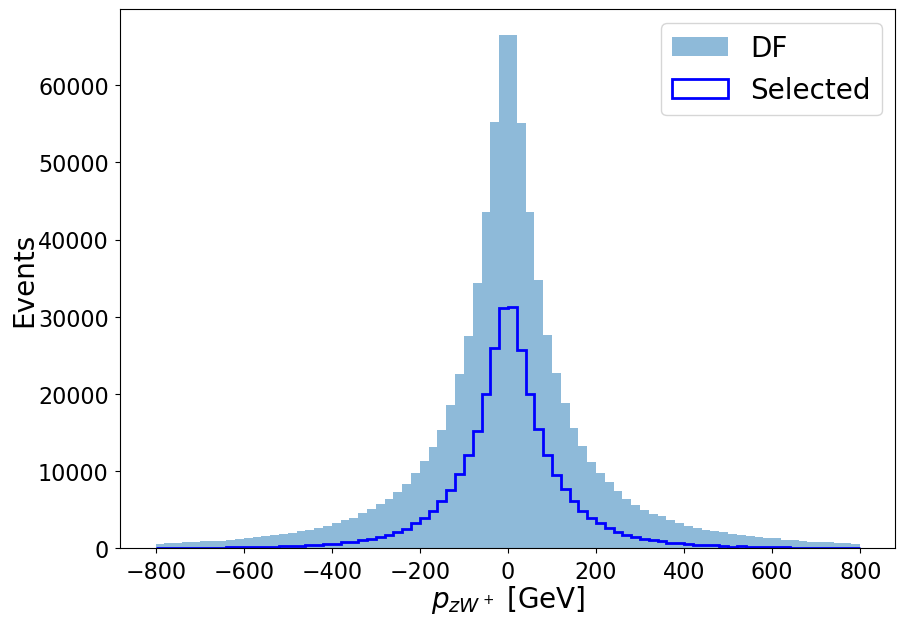

In [ ]:
w_pos_pz     = w_pos_pz[df_mask]
w_pos_pz_sel = w_pos_pz[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(-800, 800, 81)
plt.hist(w_pos_pz * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_pos_pz_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$p_{zW^+}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

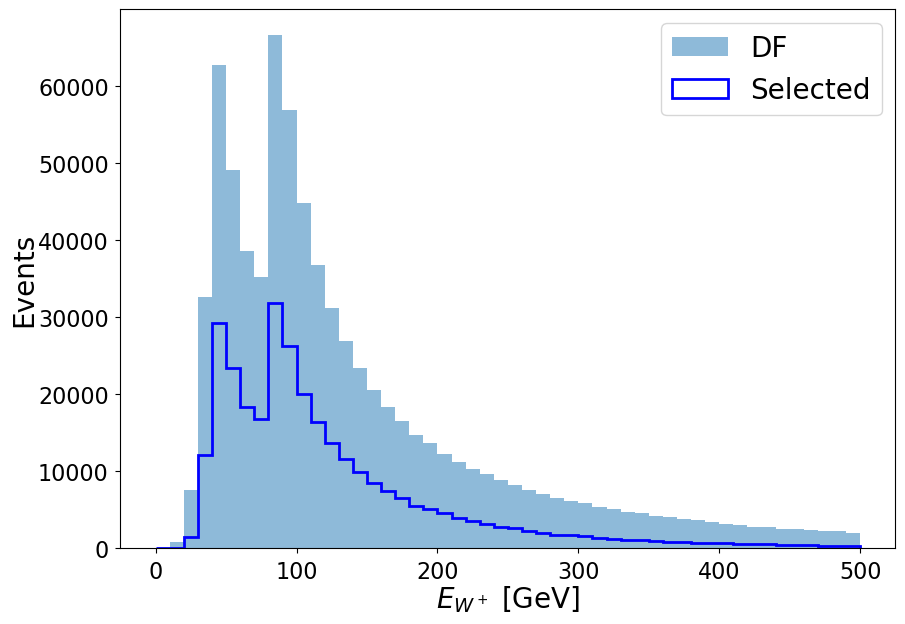

In [ ]:
w_pos_E     = w_pos_E[df_mask]
w_pos_E_sel = w_pos_E[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(0, 500, 51)
plt.hist(w_pos_E * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_pos_E_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$E_{W^+}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

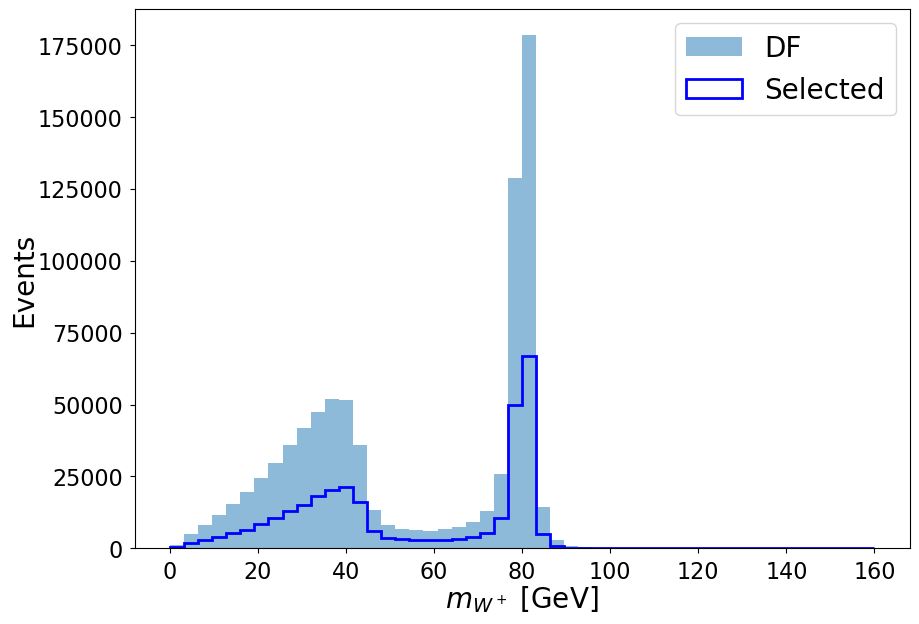

In [ ]:
w_pos_m     = w_pos_m[df_mask]
w_pos_m_sel = w_pos_m[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(0, 160, 51)
plt.hist(w_pos_m * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_pos_m_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$m_{W^+}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

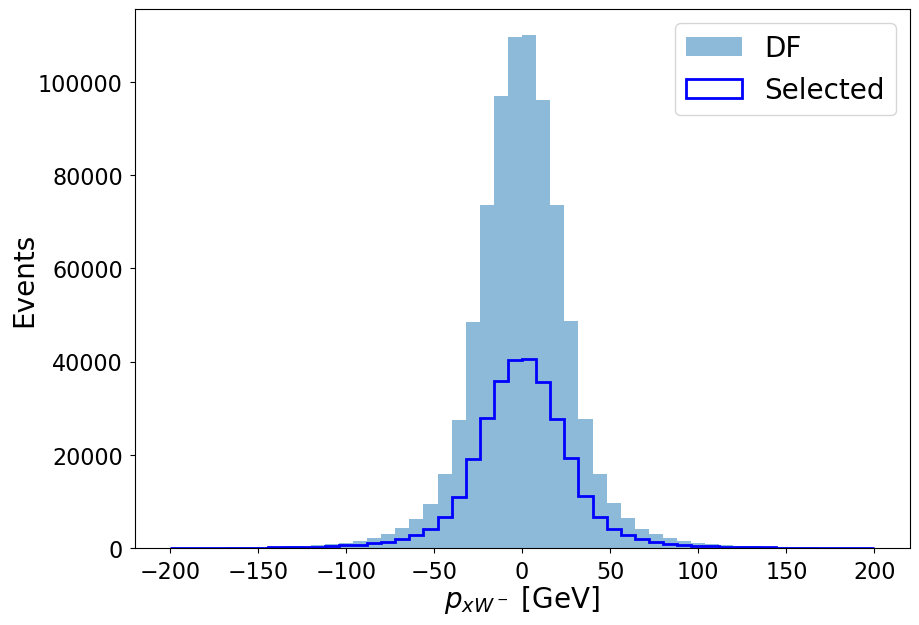

In [ ]:
w_neg_px     = w_neg_px[df_mask]
w_neg_px_sel = w_neg_px[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(-200, 200, 51)
plt.hist(w_neg_px * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_neg_px_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$p_{xW^-}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

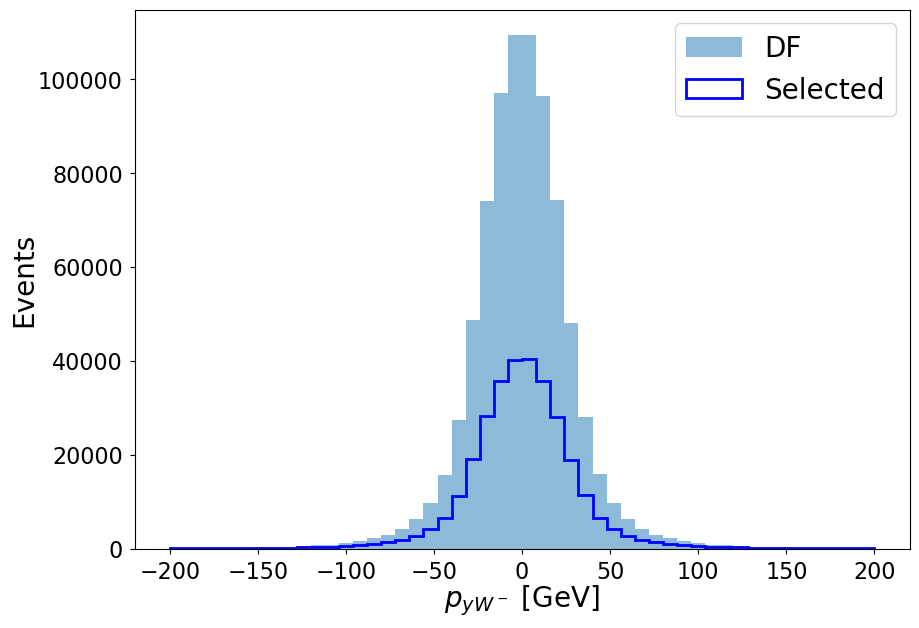

In [ ]:
w_neg_py     = w_neg_py[df_mask]
w_neg_py_sel = w_neg_py[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(-200, 200, 51)
plt.hist(w_neg_py * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_neg_py_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$p_{yW^-}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

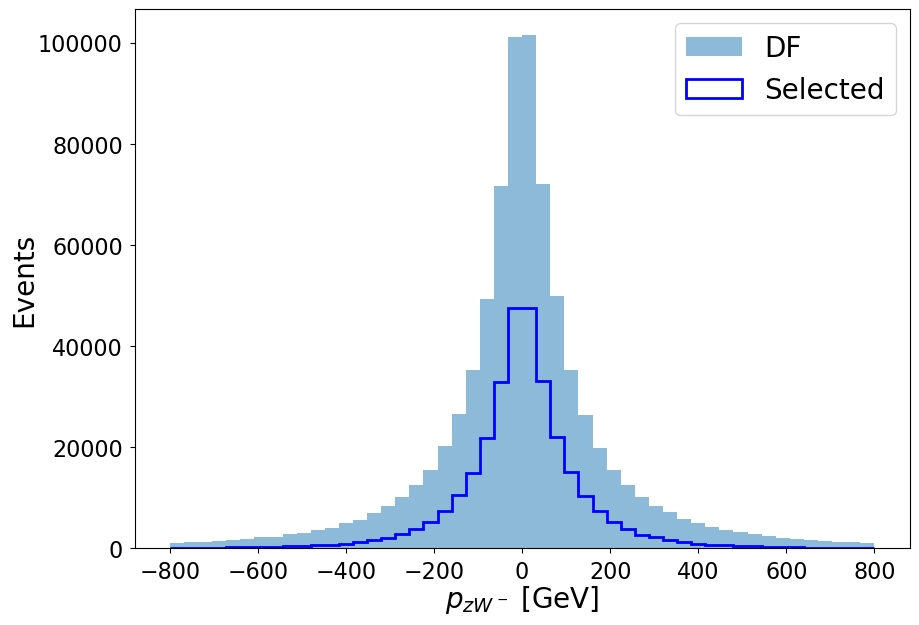

In [ ]:
w_neg_pz     = w_neg_pz[df_mask]
w_neg_pz_sel = w_neg_pz[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(-800, 800, 51)
plt.hist(w_neg_pz * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_neg_pz_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$p_{zW^-}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

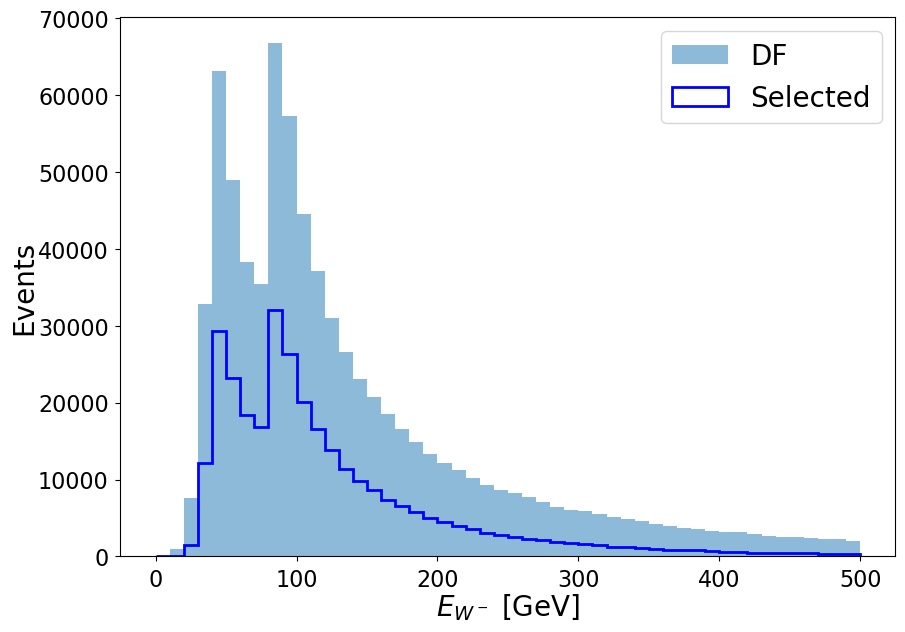

In [ ]:
w_neg_E      = w_neg_E[df_mask]
w_neg_E_sel = w_neg_E[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(0, 500, 51)
plt.hist(w_neg_E * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_neg_E_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$E_{W^-}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()

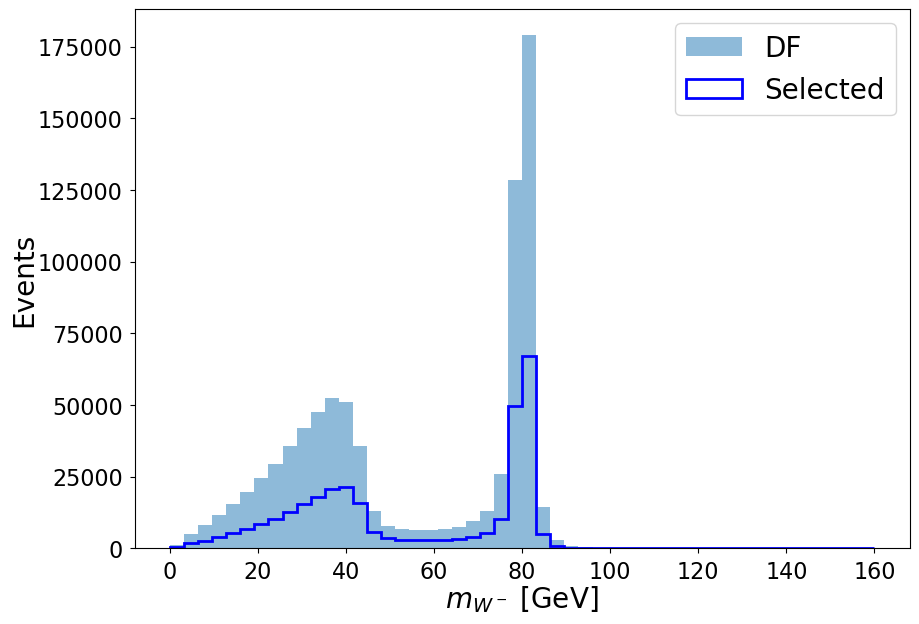

In [ ]:
w_neg_m     = w_neg_m[df_mask]
w_neg_m_sel = w_neg_m[tot_mask]

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(0, 160, 51)
plt.hist(w_neg_m * 1e-3, bins = bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"DF")
plt.hist(w_neg_m_sel * 1e-3, bins = bins_edges, histtype="step", linewidth=2, color="blue", label=r"Selected")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$m_{W^-}$ [GeV]", fontsize=20, labelpad=0)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
plt.show()